In [1]:
import pandas as pd

marvel_data=pd.read_csv("Marvel.csv")
dc_data=pd.read_csv("DC.csv")

marvel_data['Source']='Marvel'
dc_data['Source']='DC'

marvel_data.rename(columns={'Year':'YEAR'},inplace=True)

merged_data=pd.concat([marvel_data,dc_data],ignore_index=False)

merged_data.rename(columns={'FIRST APPEARANCE':'FIRST_APPEARANCE'},inplace=True)

# merged_data['APPEARANCES']=merged_data['APPEARANCES'].fillna(0).astype(int)
# merged_data['YEAR']=merged_data['YEAR'].fillna(0).astype(int)

merged_data.to_csv("merged_marvel_dc.csv",index=False)

print(merged_data.head())

   page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   

In [2]:
merged_data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST_APPEARANCE     object
YEAR                float64
Source               object
dtype: object

In [3]:
# merged_data['FIRST_APPEARANCE']=merged_data['FIRST_APPEARANCE'].fillna(0)

In [4]:
# merged_data['FIRST_APPEARANCE']=pd.to_datetime(merged_data['FIRST_APPEARANCE'],format='%Y-%m-%d',errors='coerce')

In [5]:
merged_data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES         float64
FIRST_APPEARANCE     object
YEAR                float64
Source               object
dtype: object

In [6]:
missing_data=merged_data.isnull().sum()
print(missing_data)

page_id                 0
name                    0
urlslug                 0
ID                   5783
ALIGN                3413
EYE                 13395
HAIR                 6538
SEX                   979
GSM                 23118
ALIVE                   6
APPEARANCES          1451
FIRST_APPEARANCE      884
YEAR                  884
Source                  0
dtype: int64


In [7]:
duplicates=merged_data[merged_data.duplicated(subset='name')]
duplicates=duplicates.shape[0]//2
print(duplicates)

0


In [8]:
unique_marvel_characters=marvel_data['name'].nunique()
unique_dc_characters=dc_data['name'].nunique()

print("unique_marvel_character",unique_marvel_characters)
print("unique_dc_character",unique_dc_characters)

unique_marvel_character 16376
unique_dc_character 6896


In [9]:
def extractor1(word):
    for i in range(len(word)):
        if word[i]=='(':
            return word[:i]

def extractor2(word):
    for i in range(len(word)):
        if word[i]=='(':
            return word[i+1:-1]

merged_data['Actual_Name']=merged_data['name'].apply(extractor1)
merged_data['Origin']=merged_data['name'].apply(extractor2)

print(merged_data.head())

merged_data.to_csv("merged_marvel_dc.csv",index=False)

   page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   

In [10]:
duplicates=merged_data[merged_data.duplicated(subset='Actual_Name')]
duplicates=duplicates.shape[0]//2
print(duplicates)

741


In [11]:
different_appearance=merged_data.groupby('Actual_Name')['FIRST_APPEARANCE'].nunique()
print("Characters with the same name but different first appearances:")
print(different_appearance[different_appearance>1])

Characters with the same name but different first appearances:
Actual_Name
Abel                2
Abraham Lincoln     3
Abyss               2
Ace                 2
Achilles            3
                   ..
Zipper              2
Zirconium           2
Zoga                2
Zombie              2
Zorr                2
Name: FIRST_APPEARANCE, Length: 979, dtype: int64


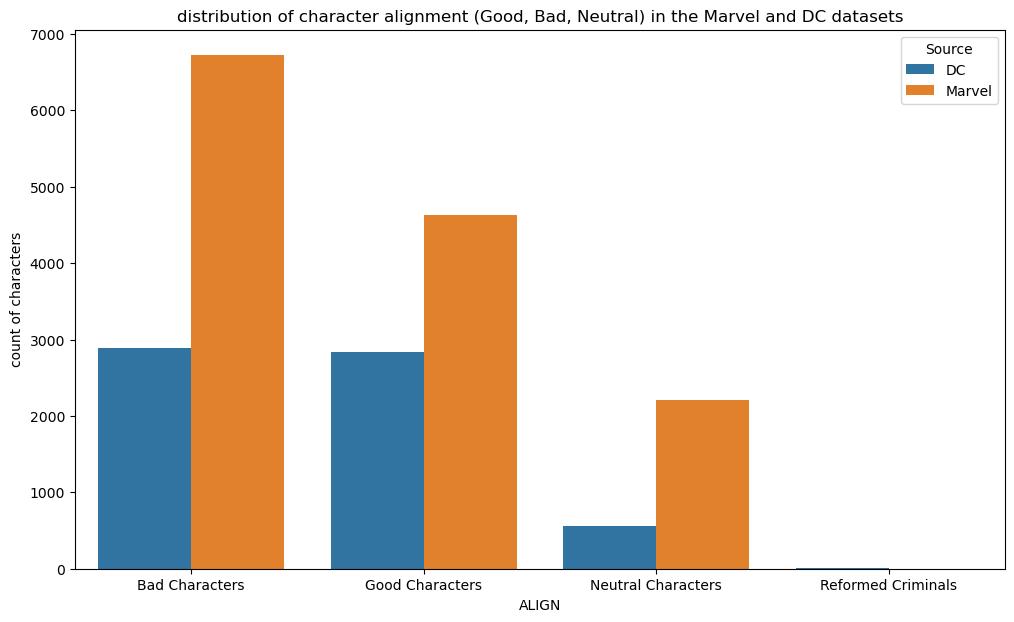

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

alignment_counts=merged_data.groupby(['ALIGN','Source']).size().reset_index(name='count of characters')

plt.figure(figsize=(12,7))
sns.barplot(data=alignment_counts,x='ALIGN',y='count of characters',hue='Source')
plt.title("distribution of character alignment (Good, Bad, Neutral) in the Marvel and DC datasets")
plt.show()

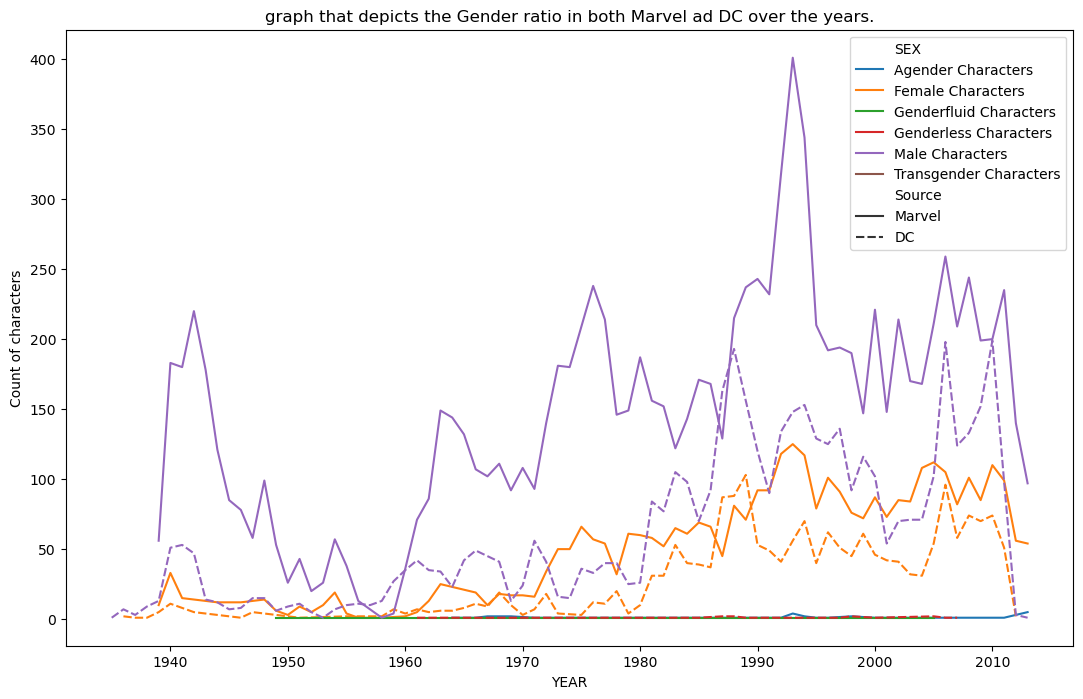

In [13]:
gender_data=merged_data.groupby(['SEX','YEAR','Source']).size().reset_index(name='Count of characters')

plt.figure(figsize=(13,8))
sns.lineplot(data=gender_data,x='YEAR',y='Count of characters',hue='SEX',style='Source')
plt.title("graph that depicts the Gender ratio in both Marvel ad DC over the years.")
plt.show()

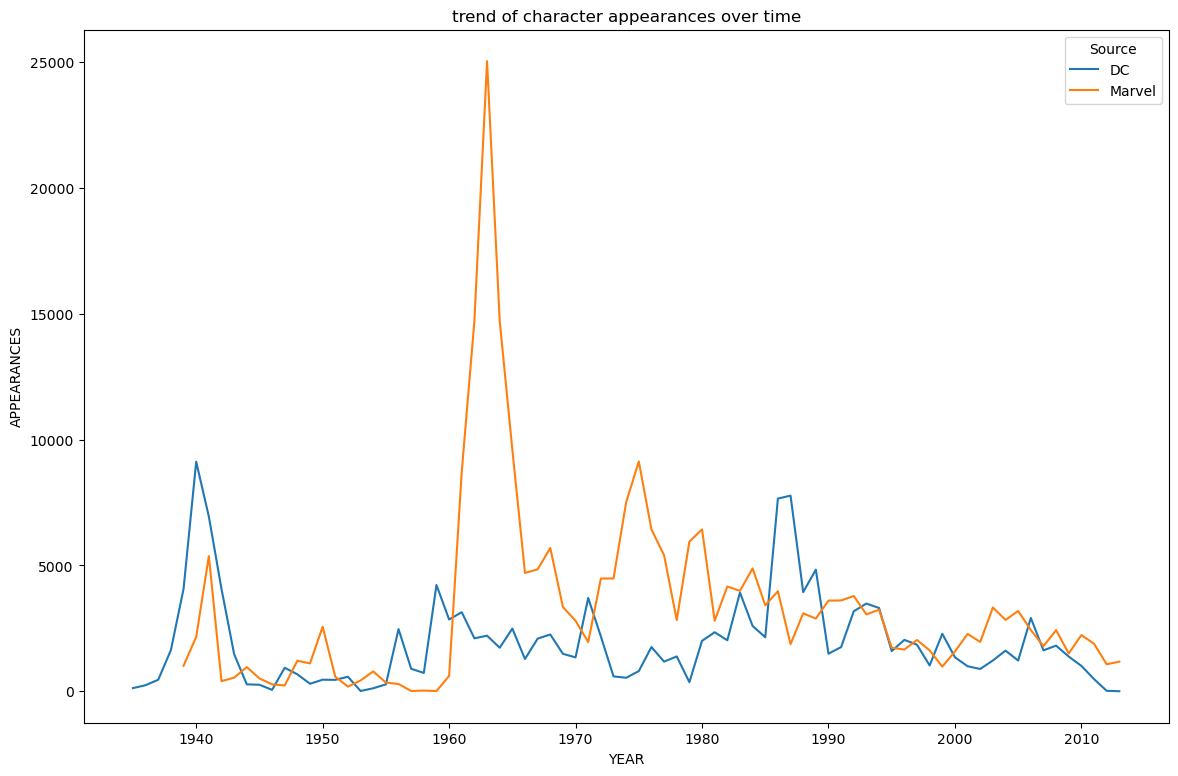

In [14]:
character_appearances=merged_data.groupby(['YEAR','Source'])['APPEARANCES'].sum().reset_index()

plt.figure(figsize=(14,9))
sns.lineplot(data=character_appearances,x='YEAR',y='APPEARANCES',hue='Source')
plt.title("trend of character appearances over time")
plt.show()

In [15]:
merged_data.describe()

,page_id,APPEARANCES,YEAR
count,23272.000000,21821.000000,22388.000000
mean,254956.821932,19.009303,1986.420046
std,231417.093079,93.814040,18.972698
min,1025.000000,1.000000,1935.000000
25%,31385.750000,1.000000,1976.000000
50%,192263.500000,4.000000,1990.000000
75%,456337.750000,10.000000,2001.000000
max,755278.000000,4043.000000,2013.000000


In [16]:
merged_data['EYE'].value_counts()

EYE
Blue Eyes             3064
Brown Eyes            2803
Black Eyes             967
Green Eyes             904
Red Eyes               716
White Eyes             516
Yellow Eyes            342
Grey Eyes              135
Hazel Eyes              99
Variable Eyes           49
Photocellular Eyes      48
Purple Eyes             45
Orange Eyes             35
Pink Eyes               27
Violet Eyes             23
Gold Eyes               23
One Eye                 21
Amber Eyes              15
Silver Eyes             12
Multiple Eyes            7
No Eyes                  7
Auburn Hair              7
Yellow Eyeballs          6
Black Eyeballs           3
Magenta Eyes             2
Compound Eyes            1
Name: count, dtype: int64

In [17]:
merged_data['EYE']=merged_data['EYE'].fillna('Blue Eyes')

In [18]:
missing_data=merged_data.isnull().sum()
print(missing_data)

page_id                 0
name                    0
urlslug                 0
ID                   5783
ALIGN                3413
EYE                     0
HAIR                 6538
SEX                   979
GSM                 23118
ALIVE                   6
APPEARANCES          1451
FIRST_APPEARANCE      884
YEAR                  884
Source                  0
Actual_Name            37
Origin                 37
dtype: int64


In [19]:
import sqlite3

In [20]:
conn=sqlite3.connect('merged_marvel_dc.db')
merged_data.to_sql('merged_data',conn,if_exists='replace',index=False)

23272

In [21]:
def execute_query(query):
    cursor=conn.cursor()
    cursor.execute(query)
    result=cursor.fetchall()
    cursor.close()
    return result

In [22]:
query1="""
SELECT Actual_Name,Source,APPEARANCES,ALIGN
FROM merged_data
WHERE APPEARANCES IS NOT NULL
ORDER BY Source, APPEARANCES DESC
LIMIT 5;
"""
for row in execute_query(query1):
    print(row)

('Batman ', 'DC', 3093.0, 'Good Characters')
('Superman ', 'DC', 2496.0, 'Good Characters')
('Green Lantern ', 'DC', 1565.0, 'Good Characters')
('James Gordon ', 'DC', 1316.0, 'Good Characters')
('Richard Grayson ', 'DC', 1237.0, 'Good Characters')


In [23]:
query2="""
select COUNT(*) as characters_with_man_Woman
FROM merged_data
where Actual_Name LIKE '%man%' OR Actual_Name LIKE '%Woman%';
"""
print(execute_query(query2)[0][0])

643


In [24]:
query3="""
select COUNT(*)
from merged_data
where HAIR='Blond Hair' AND ALIGN='Good Characters';
"""
print(execute_query(query3)[0][0])

980


In [25]:
query4="""
SELECT Actual_Name, COUNT(DISTINCT FIRST_APPEARANCE) as appearance_variations
FROM merged_data
WHERE Actual_Name IS NOT NULL AND FIRST_APPEARANCE IS NOT NULL
GROUP BY Actual_Name
HAVING COUNT(DISTINCT FIRST_APPEARANCE) > 1;
"""
for row in execute_query(query4):
    print(row)

('Abel ', 2)
('Abraham Lincoln ', 3)
('Abyss ', 2)
('Ace ', 2)
('Achilles ', 3)
('Acrobat ', 2)
('Adam ', 2)
('Adam Essex ', 2)
('Adara ', 2)
('Adolf Hitler ', 3)
('Adora ', 2)
('Adriana Soria ', 2)
('Aftermath ', 2)
('Agamemnon ', 3)
('Agatha Harkness ', 2)
('Agent Axis ', 2)
('Agent Orange ', 2)
('Agent X ', 2)
('Agony ', 2)
('Ahpuch ', 2)
('Ajax ', 3)
('Alana Jobson ', 2)
('Alaric ', 2)
('Alecto ', 4)
('Alex ', 3)
('Alexei Vazhin ', 2)
('Alhambra ', 2)
('Alicia Masters ', 2)
('Alpha ', 3)
('Althea ', 2)
('Amazo ', 2)
('Amber ', 2)
('Amon ', 2)
('Amora ', 2)
('Andr\\u00e9 Gerard ', 2)
('Andrea von Strucker ', 2)
('Andrew Jackson ', 2)
('Andy ', 2)
('Angel ', 5)
('Angel of Death ', 3)
('Angela ', 2)
('Anitun ', 2)
('Annie ', 3)
('Antaeus ', 2)
('Anthony Stark ', 4)
('Antiphon ', 2)
('Anton Vanko ', 3)
('Ape ', 4)
('Aphrodite ', 2)
('Aquarius ', 3)
('Aquon ', 2)
('Arachne ', 2)
('Aragorn ', 2)
('Arc ', 2)
('Architect ', 2)
('Archon ', 2)
('Ares ', 2)
('Argos ', 3)
('Argus ', 2)
('Ariel